<a href="https://colab.research.google.com/github/iAlexeze/.github/blob/main/pandas_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt



In [47]:
# Load data source
data_source = "/googl_data_2020_2025.csv"

df = pd.read_csv(data_source)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [48]:
# Clean up data
df.columns = df.iloc[0]
df = df[2:].reset_index(drop=True)
df.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [52]:
# Convert Date column to proper time series
import datetime as dt
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [64]:
# Convert Numerical columes from strings to numbers
numeric_colums = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
for col in numeric_colums:
  df[col] = pd.to_numeric(df[col])
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.186821,68.433998,68.433998,67.324501,67.420502,27278000
1,2020-01-03 00:00:00+00:00,67.830101,68.075996,68.687500,67.365997,67.400002,23408000
2,2020-01-06 00:00:00+00:00,69.638054,69.890503,69.916000,67.550003,67.581497,46768000
3,2020-01-07 00:00:00+00:00,69.503548,69.755501,70.175003,69.578003,70.023003,34330000
4,2020-01-08 00:00:00+00:00,69.998253,70.251999,70.592499,69.631500,69.740997,35314000


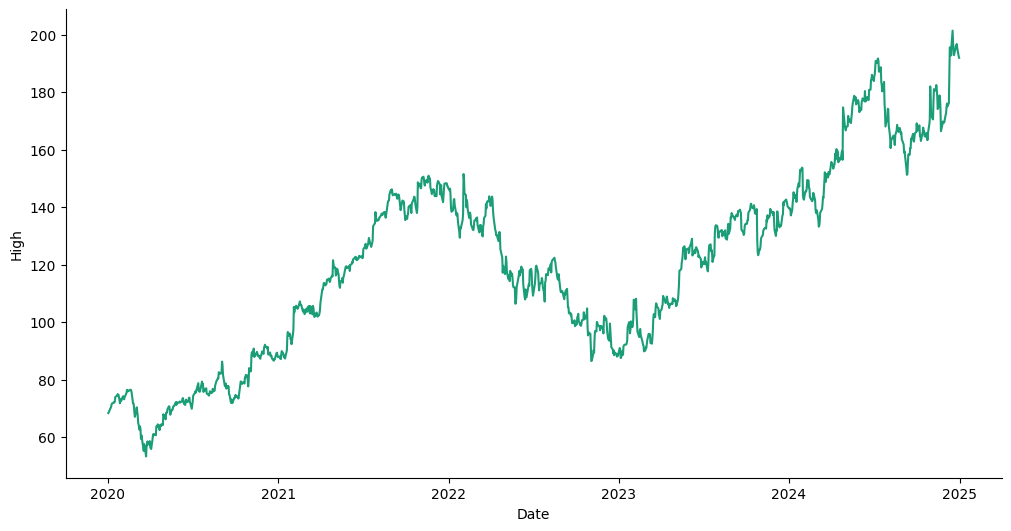

In [65]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

                           Adj Close      Close       High        Low  \
Date                                                                    
2020-01-14 00:00:00+00:00  71.271141  71.529503  72.131500  71.388496   
2020-01-15 00:00:00+00:00  71.700081  71.959999  72.039001  71.583000   
2020-01-16 00:00:00+00:00  72.246101  72.508003  72.535004  72.000000   
2020-01-17 00:00:00+00:00  73.708794  73.975998  74.027496  72.827499   
2020-01-21 00:00:00+00:00  73.844818  74.112503  74.494003  73.510498   

                                Open    Volume  
Date                                            
2020-01-14 00:00:00+00:00  72.000000  26076000  
2020-01-15 00:00:00+00:00  71.651001  21550000  
2020-01-16 00:00:00+00:00  72.272499  26080000  
2020-01-17 00:00:00+00:00  73.126999  52424000  
2020-01-21 00:00:00+00:00  73.949997  48930000  


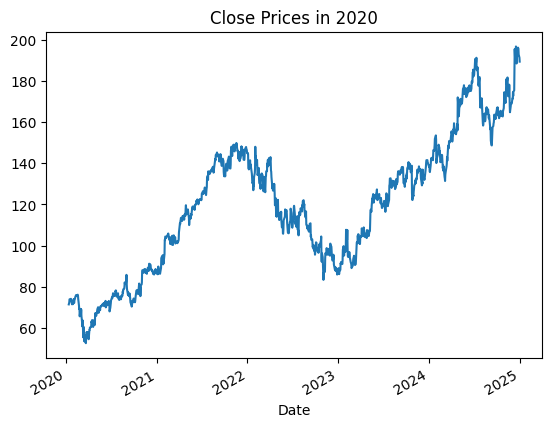

In [41]:
print(df.head())
df['Close'].plot(title='Close Prices in 2020')
plt.show()
